In [163]:
import utils
from typing import List
from collections import namedtuple
import numpy as np
import pandas as pd

# image and animation
import altair as alt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
# plotly express works but was hideously slow with a lot of datapoints.
#import plotly.express as px

# Day 03

https://adventofcode.com/2019/day/3

We have two wires, need to figure out at what coordinates they cross closest to the central port, which is `(0,0)`, then get the manhatten distance.

In [7]:
test_inp = """R75,D30,R83,U83,L12,D49,R71,U7,L72
U62,R66,U55,R34,D71,R55,D58,R83"""

# cause namedtuples are nice and clear
Move = namedtuple("Move", ["dir", "dist"])

def parse_wire(wire):
    return [Move(w[0], int(w[1:])) for w in wire]

def parse_input(day=3, test=None) -> List[str]:
    """parses input to a list of ints"""
    if test:
        inp = test_inp
    else:
        inp = utils.get_input(day)
    
    a, b = inp.strip().splitlines()
    a, b = a.split(","), b.split(",")
    
    return parse_wire(a), parse_wire(b)
 
a, b = parse_input()
a[:2], b[:2]

([Move(dir='R', dist=991), Move(dir='U', dist=77)],
 [Move(dir='L', dist=997), Move(dir='U', dist=989)])

In [8]:
# helper utils

def overlapping_points(points1, points2):
    overlap = set(points1).intersection(points2)
    overlap.remove((0,0))
    return overlap
    
def manhatten_distance(p1, p2=(0,0)):
    return sum([abs(x-y) for x,y in zip(p1, p2)])

In [9]:
# dict to convert move direction to numbers
m = {"U": ( 0,  1),
     "D": ( 0, -1),
     "L": (-1,  0),
     "R": ( 1,  0)}
     
def get_points(wire):
    pos = tuple([0,0]) # starting position
    points = [pos]     # list holding all points
    
    for move in wire:
        step = m[move.dir]   # direction wire is moving in
        
        for _ in range(move.dist):
            pos = tuple([i +j for i, j in zip(pos, step)])
            points.append(pos)
    return points

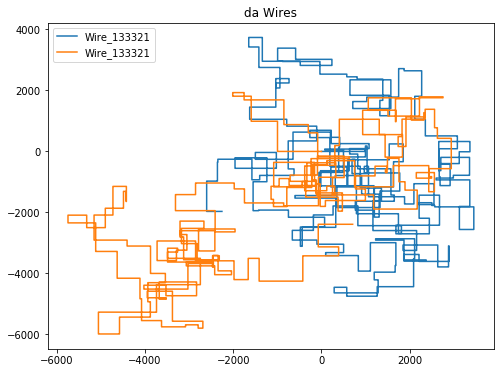

In [142]:
fig, ax = plt.subplots(figsize=(8,6))
    
points1 = get_points(wire1)
points2 = get_points(wire2)
overlap = overlapping_points(points1, points2)

x, y = zip(*points1)
line1, = ax.plot(x, y, label=f"Wire_{i+1}")
x2, y2 = zip(*points2)
line2, = ax.plot(x2, y2, label=f"Wire_{i+1}")

ax.set_title("da Wires")
ax.legend(loc="upper left")

def animate(num):
    line1.set_data(x[:num], y[:num])
    line2.set_data(x2[:num], y2[:num])
    return (line1, line2)
    #return line1, line2

frames = np.arange(0, len(x)+1000, 1000)
ani = animation.FuncAnimation(
    fig, animate, frames, blit=True)

HTML(ani.to_jshtml())

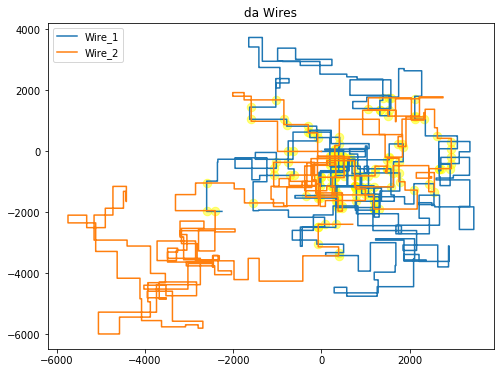

In [48]:
def plot_wires(wire1, wire2, frame=10):
    fig, ax = plt.subplots(figsize=(8,6))
    
    points1 = get_points(wire1[:frame])
    points2 = get_points(wire2[:frame])
    overlap = overlapping_points(points1, points2)
    
    for i, points in enumerate([points1, points2]):
        x, y = zip(*points)
        ax.plot(x, y, label=f"Wire_{i+1}")
    
    # highlight overlaps
    if overlap:
        x, y = zip(*overlap)
        ax.scatter(x, y, alpha=0.5, s=max(x)//40, 
                   marker="o", color="yellow")    
    
    ax.set_title("da Wires")
    ax.legend(loc="upper left")
    plt.show()
    
plot_wires(a, b, frame=1300000)

In [166]:
wire1, wire2 = parse_input()
points1 = get_points(wire1)
points2 = get_points(wire2)

overlap = overlapping_points(points1, points2)
    
x, y = zip(*points1)
df1 = pd.DataFrame({"x": x, "y": y, "name": "Wire 1", 
                    "frame": np.arange(len(x))})
x, y = zip(*points2)
df2 = pd.DataFrame({"x": x, "y": y, "name": "Wire 2", 
                    "frame": np.arange(len(x))})
    
df = pd.concat([df1, df2])
print(df.shape)
df.head()

(284572, 4)


x  y    name  frame
0  0  0  Wire 1      0
1  1  0  Wire 1      1
2  2  0  Wire 1      2
3  3  0  Wire 1      3
4  4  0  Wire 1      4

In [172]:
hv.Curve([x,y])

:Curve   [x]   (y)

In [171]:
import holoviews as hv
hv.Scatter(df[:100], "x", "y")

:Scatter   [x]   (y)

In [167]:
alt.Chart(df).mark_line().encode(
    x='x',
    y='y',
    color="name"
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [ ]:
def solve_1():
    wire1, wire2 = parse_input()
    
    points1 = get_points(wire1)
    points2 = get_points(wire2)
    
    overlap = overlapping_points(points1, points2)
    
    min_dist = 1000000
    ans = None
    for point in overlap:
        distance = manhatten_distance(point)
        if distance < min_dist:
            min_dist = distance
            ans = point
            
    return min_dist
            
    
solve_1()

303

## Animated solver

## Part 2

Calc num of steps each wire takes to reach each intersection, and find the intersection with the fewest combined steps for both wires to reach. Use the step from the first time the wire reaches that point.

In [ ]:
def solve_2():
    wire1, wire2 = parse_input()
    
    points1 = get_points(wire1)
    points2 = get_points(wire2)
    
    overlap = overlapping_points(points1, points2)
    
    min_step = 100000
    best_point = None
    
    for point in overlap:
        steps = points1.index(point) + points2.index(point)
        if steps <= min_step:
            min_step = steps
            best_point = point
            
    return min_step, best_point
    
solve_2()

(11222, (499, -179))

`11222` is the correct answer